In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Mengatur tema plot untuk visualisasi yang lebih baik
sns.set(style="whitegrid")


In [4]:
data = pd.read_excel('/content/data bps1.xlsx')
data.head()

,JUMLAH PENDUDUK,LUAS WILAYAH(KM),JUMLAH RUMAH,TEMBOK,JUMLAH SEKOLAH,JUMLAH RS,Usia 15-64 (%),Indihome,lokal
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada


In [5]:
data = data.drop_duplicates()
print("Jumlah nilai yang hilang:\n", data.isnull().sum())
data = data.dropna()
print("Ukuran dataset setelah data cleaning:", data.shape)
data.head()


Jumlah nilai yang hilang:
 JUMLAH PENDUDUK     0
LUAS WILAYAH(KM)    0
JUMLAH RUMAH        0
TEMBOK              0
JUMLAH SEKOLAH      0
JUMLAH RS           0
Usia 15-64 (%)      0
Indihome            0
lokal               0
dtype: int64
Ukuran dataset setelah data cleaning: (31, 9)


,JUMLAH PENDUDUK,LUAS WILAYAH(KM),JUMLAH RUMAH,TEMBOK,JUMLAH SEKOLAH,JUMLAH RS,Usia 15-64 (%),Indihome,lokal
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada


In [10]:
data['KEPADATAN PENDUDUK'] = data['JUMLAH PENDUDUK'] / data['LUAS WILAYAH(KM)']
data['RASIO RUMAH/PENDUDUK'] = data['JUMLAH RUMAH'] / data['JUMLAH PENDUDUK']
data['RASIO SEKOLAH/PENDUDUK'] = data['JUMLAH SEKOLAH'] / data['JUMLAH PENDUDUK']
data

,JUMLAH PENDUDUK,LUAS WILAYAH(KM),JUMLAH RUMAH,TEMBOK,JUMLAH SEKOLAH,JUMLAH RS,Usia 15-64 (%),Indihome,lokal,KEPADATAN PENDUDUK,RASIO RUMAH/PENDUDUK,RASIO SEKOLAH/PENDUDUK
0,89863,48.466,20892,16914.1632,24,-,61466.292,ada,ada,1854.145174,0.232487,0.000267
1,51589,148.370,10887,8814.1152,12,-,35286.876,ada,ada,347.705062,0.211033,0.000233
2,93775,239.580,25805,20891.7280,25,-,64142.100,ada,ada,391.414141,0.275180,0.000267
3,89418,55.000,22143,17926.9728,26,1,61161.912,ada,ada,1625.781818,0.247635,0.000291
4,157296,195.410,39204,31739.5584,25,-,107590.464,ada,ada,804.953687,0.249237,0.000159
5,72183,152.070,15942,12906.6432,16,-,49373.172,ada,ada,474.669560,0.220855,0.000222
6,118278,91.940,28307,22917.3472,62,-,80902.152,ada,tidak,1286.469437,0.239326,0.000524
7,89712,54.570,21331,17269.5776,33,1,61363.008,ada,tidak,1643.980209,0.237772,0.000368
8,140119,51.030,32348,26188.9408,43,-,95841.396,ada,ada,2745.816187,0.230861,0.000307
9,100495,40.140,24299,19672.4704,22,1,68738.580,ada,tidak,2503.612357,0.241793,0.000219


**univariate**

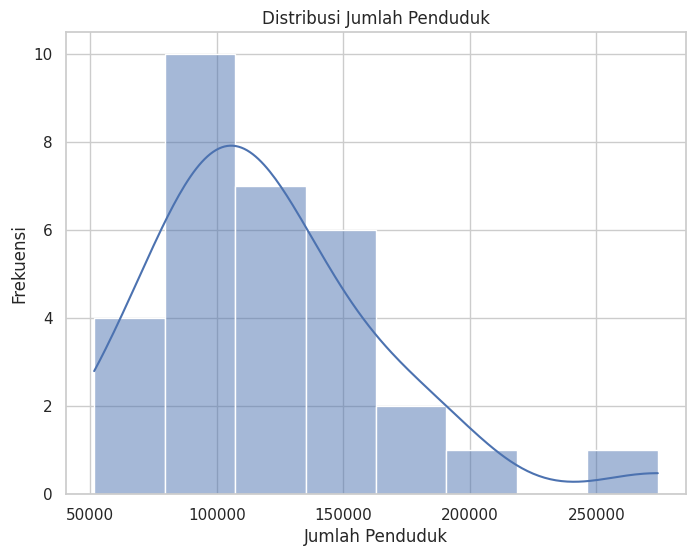

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data['JUMLAH PENDUDUK'], kde=True)
plt.title('Distribusi Jumlah Penduduk')
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Frekuensi')
plt.show()

Sebagian besar daerah memiliki jumlah penduduk rendah, dengan konsentrasi tertinggi di sekitar 100.000 jiwa, sementara beberapa daerah memiliki jumlah penduduk sangat tinggi, menyebabkan distribusi miring ke kanan.

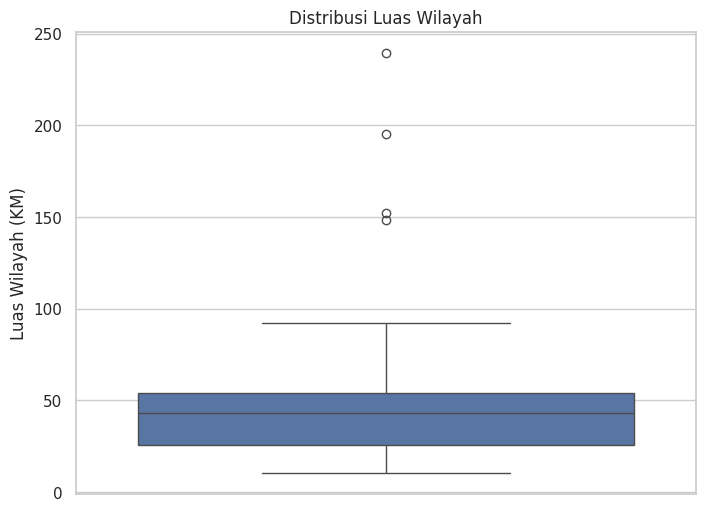

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['LUAS WILAYAH(KM)'])
plt.title('Distribusi Luas Wilayah')
plt.ylabel('Luas Wilayah (KM)')
plt.show()


Berdasarkan boxplot, dapat disimpulkan bahwa distribusi luas wilayah cenderung miring ke kanan, dengan median sekitar 50 kilometer persegi, kuartil bawah (Q1) sekitar 15 kilometer persegi, kuartil atas (Q3) sekitar 85 kilometer persegi, dan jangkauan interkuartil (IQR) sekitar 70 kilometer persegi. Terdapat dua outlier yang menunjukkan wilayah dengan luas jauh lebih besar. Kesimpulannya, data luas wilayah tidak merata, dengan sebagian besar wilayah memiliki luas kecil dan beberapa wilayah memiliki luas jauh lebih besar.

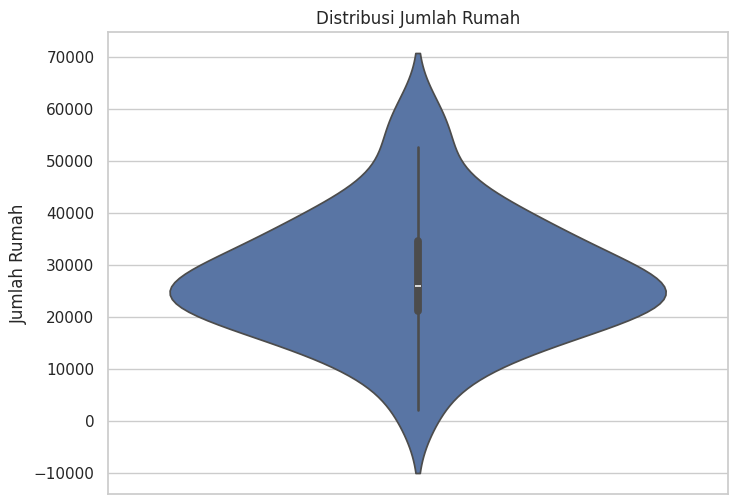

In [9]:
plt.figure(figsize=(8, 6))
sns.violinplot(data['JUMLAH RUMAH'])
plt.title('Distribusi Jumlah Rumah')
plt.ylabel('Jumlah Rumah')
plt.show()

Berdasarkan Violin Plot, distribusi jumlah rumah tidak simetris dan cenderung miring ke kanan, menunjukkan lebih banyak wilayah dengan jumlah rumah sedikit. Median jumlah rumah berada di sekitar 2500, dengan rentang kuartil (IQR) yang besar, menandakan variansi yang signifikan di antara wilayah. Terdapat beberapa outlier di bagian atas, menunjukkan wilayah dengan jumlah rumah jauh lebih tinggi. Kesimpulannya, ada perbedaan signifikan dalam jumlah rumah antar wilayah, dengan sebagian besar wilayah memiliki jumlah rumah sedikit dan beberapa wilayah memiliki jumlah yang sangat banyak.

**multivariate analysis**

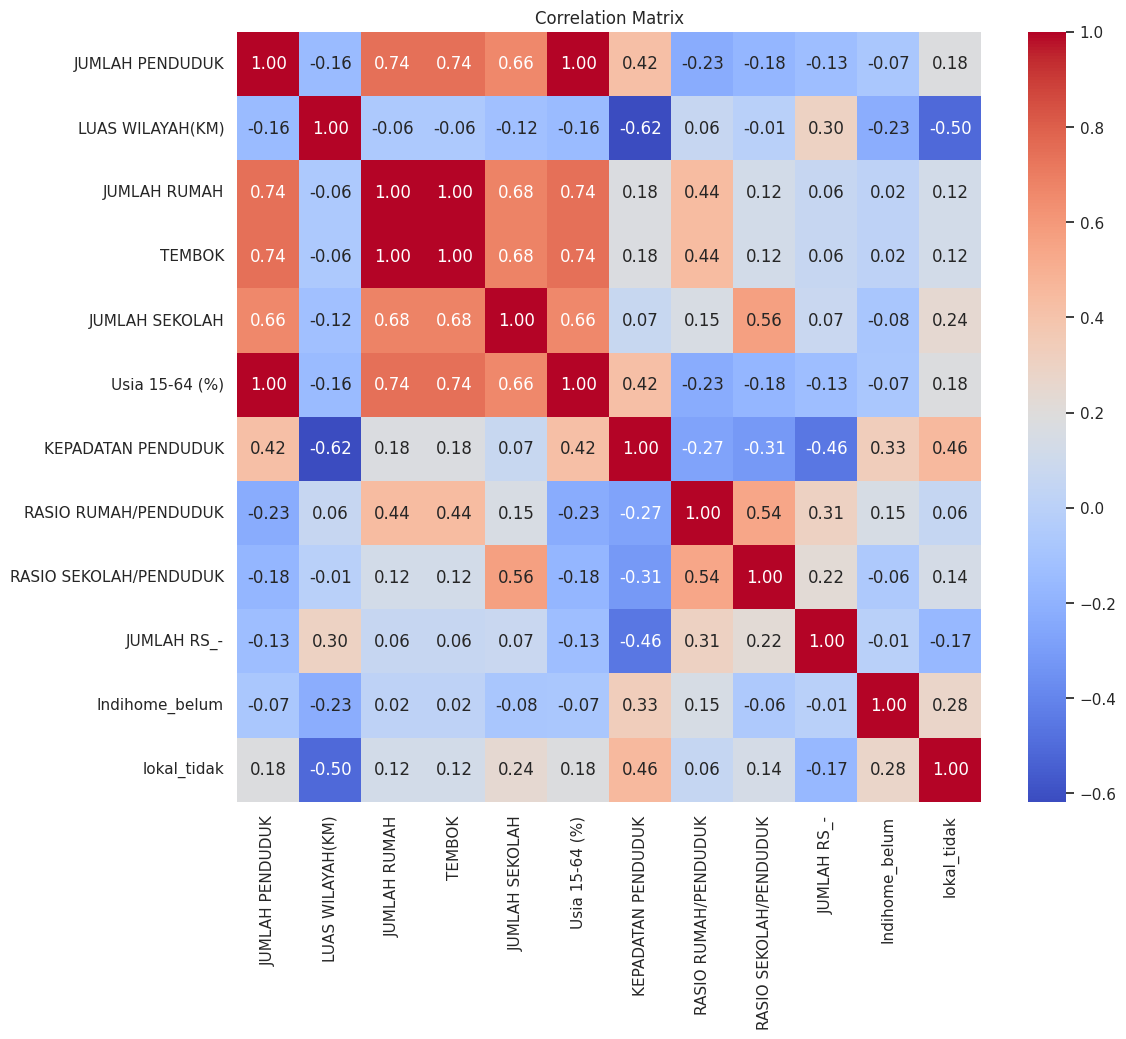

In [12]:
dataolahencoding = data.copy()

# Perform one-hot encoding on categorical columns (if any)
categorical_cols = dataolahencoding.select_dtypes(include=['object']).columns
dataolahencoding = pd.get_dummies(dataolahencoding, columns=categorical_cols, drop_first=True)


correlation_matrix = dataolahencoding.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
dataolahencoding

,JUMLAH PENDUDUK,LUAS WILAYAH(KM),JUMLAH RUMAH,TEMBOK,JUMLAH SEKOLAH,Usia 15-64 (%),KEPADATAN PENDUDUK,RASIO RUMAH/PENDUDUK,RASIO SEKOLAH/PENDUDUK,JUMLAH RS_-,Indihome_belum,lokal_tidak
0,89863,48.466,20892,16914.1632,24,61466.292,1854.145174,0.232487,0.000267,True,False,False
1,51589,148.370,10887,8814.1152,12,35286.876,347.705062,0.211033,0.000233,True,False,False
2,93775,239.580,25805,20891.7280,25,64142.100,391.414141,0.275180,0.000267,True,False,False
3,89418,55.000,22143,17926.9728,26,61161.912,1625.781818,0.247635,0.000291,False,False,False
4,157296,195.410,39204,31739.5584,25,107590.464,804.953687,0.249237,0.000159,True,False,False
5,72183,152.070,15942,12906.6432,16,49373.172,474.669560,0.220855,0.000222,True,False,False
6,118278,91.940,28307,22917.3472,62,80902.152,1286.469437,0.239326,0.000524,True,False,True
7,89712,54.570,21331,17269.5776,33,61363.008,1643.980209,0.237772,0.000368,False,False,True
8,140119,51.030,32348,26188.9408,43,95841.396,2745.816187,0.230861,0.000307,True,False,False
9,100495,40.140,24299,19672.4704,22,68738.580,2503.612357,0.241793,0.000219,False,False,True


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

    principal component 1  principal component 2
0           -37588.885001            -828.284513
1           -85641.512810           -3775.467644
2           -31674.021910            4466.026289
3           -37787.542522             869.092025
4            47178.592426            5465.118193
5           -59887.570797           -2557.835366
6            -1952.347131            1453.191728
7           -37655.166009            -225.478028
8            25036.573240             999.905482
9           -24068.460540             764.130246
10          -70102.088459           15475.151150
11            2038.418857          -19291.059172
12           87162.721071            4597.641110
13           52623.284468            4553.514942
14          -35010.192559           17385.471125
15           71645.810459            1386.218722
16          189448.668193           -7207.091385
17          -12272.651545            5850.179844
18           19804.719229           -2757.299273
19          -45003.9

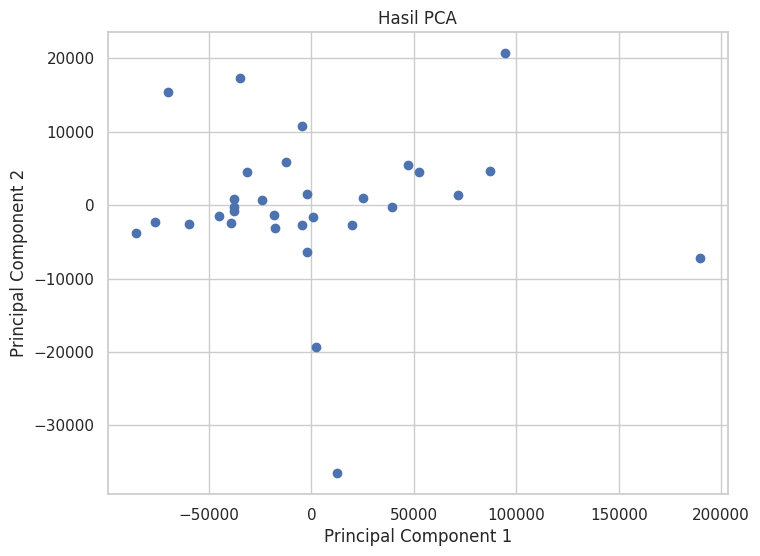

In [15]:
x = dataolahencoding
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil PCA')
plt.show()

Dari hasil PCA, kita dapat melihat bahwa data tersebar secara acak dan tidak memiliki pola yang jelas. Ini menunjukkan bahwa data tidak memiliki hubungan linier yang kuat antara variabel-variabelnya.

Namun, kita perlu melihat analisis lebih lanjut untuk menyimpulkan apakah data tersebut memang tidak memiliki hubungan yang kuat. Analisis tambahan seperti analisis cluster dapat membantu kita mengidentifikasi hubungan non-linier dalam data.

In [16]:
from sklearn.cluster import KMeans

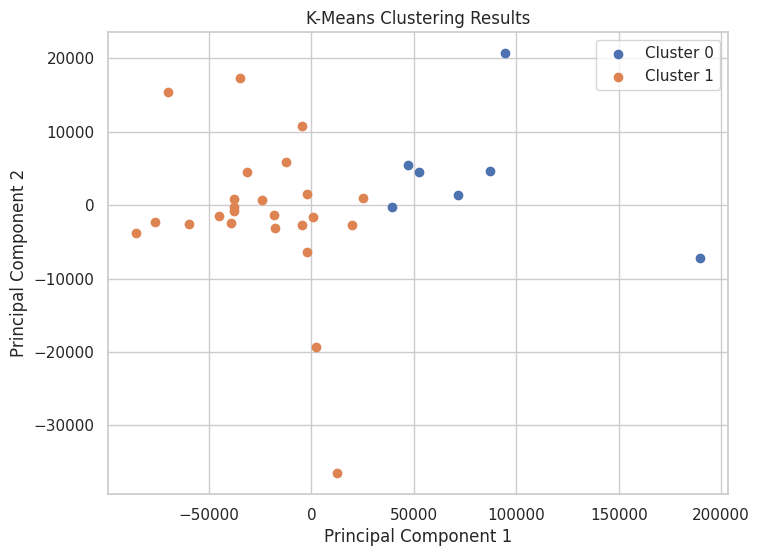

In [17]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

Hasil dari pengelompokan K-means dengan dua klaster. Klaster 0 ditampilkan dalam warna biru dan klaster 1 dalam warna oranye. Dapat dilihat bahwa klaster 0 memiliki titik-titik yang tersebar di sebelah kanan atas grafik, sedangkan klaster 1 memiliki titik-titik yang lebih tersebar di sebelah kiri bawah grafik. Hal ini menunjukkan bahwa algoritma K-means telah berhasil mengidentifikasi dua kelompok titik data yang berbeda dengan memperhatikan jarak antar titik data.

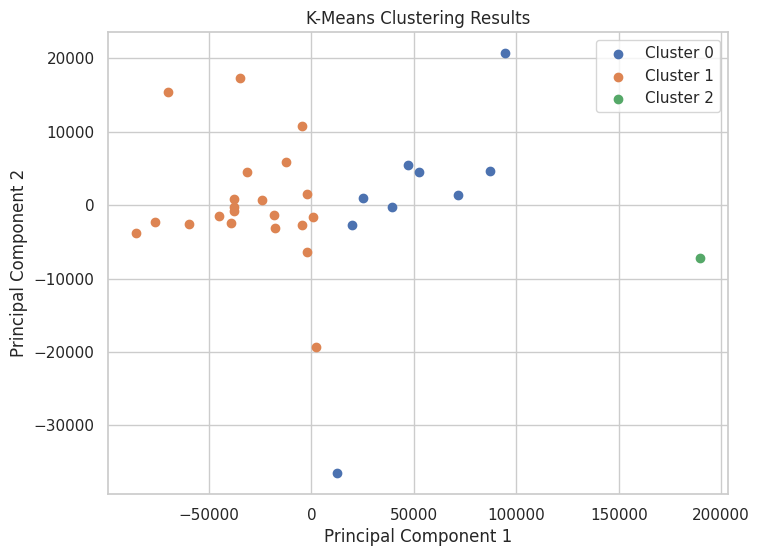

In [18]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

Gambar tersebut menunjukkan hasil dari clustering menggunakan algoritma K-Means dengan 3 cluster. Terdapat tiga cluster yang diberi label sebagai Cluster 0, Cluster 1, dan Cluster 2. Cluster 0 terletak di sebelah kanan atas, Cluster 1 terletak di sebelah kiri tengah, dan Cluster 2 terletak di sebelah kanan bawah. Cluster 0 memiliki jumlah poin yang lebih sedikit dibandingkan dengan Cluster 1. Cluster 2 memiliki jumlah poin yang paling sedikit.

Kesimpulan:

Algoritma K-Means berhasil memisahkan data menjadi 3 cluster yang berbeda.
Cluster 0 dan Cluster 1 relatif terkonsentrasi di sekitar titik pusatnya.
Cluster 2 memiliki titik-titik yang tersebar lebih luas, dan mungkin ada pertimbangan tambahan untuk mempertimbangkan apakah cluster ini dapat dipecah menjadi cluster yang lebih kecil.

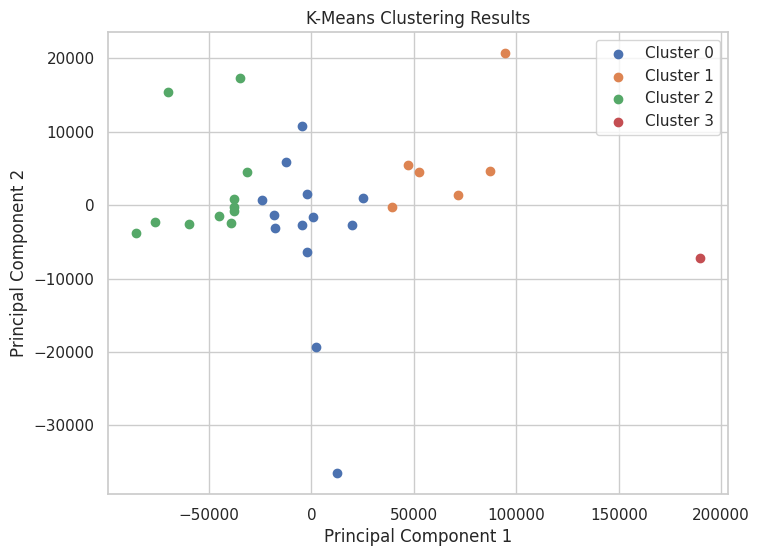

In [19]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

Gambar tersebut menampilkan hasil clustering dari algoritma K-means. Clustering ini dilakukan pada data 2 dimensi dan terbagi menjadi 4 cluster yang dibedakan dengan warna biru, orange, hijau, dan merah.

Cluster 0 (biru) memiliki 19 data point yang mengelompok di sekitar nilai 0 pada sumbu Y. Data pointnya menyebar di sumbu X, mulai dari sekitar -50000 hingga 10000.

Cluster 1 (orange) memiliki 7 data point yang mengelompok di sekitar nilai 5000 pada sumbu X. Data pointnya menyebar di sumbu Y, mulai dari sekitar 0 hingga 20000.

Cluster 2 (hijau) memiliki 11 data point yang mengelompok di sekitar nilai -1000 pada sumbu X dan nilai 0 pada sumbu Y.

Cluster 3 (merah) memiliki 1 data point yang berada di titik (190000, -7000).